<h1> Solving Schrödinger EQ with NN/Numerical Solvers<h1>

<h4>Dawit Aklilu

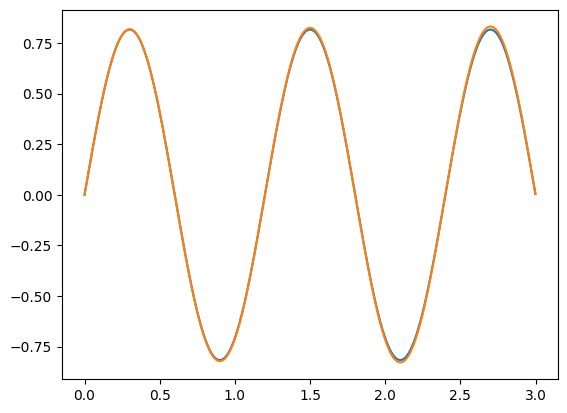

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
# Add any other needed imports here

# Add any needed set-up code here

Deltax = 0.001 # The smaller the better for Deltax

n = 5
a = 3.0
hbar = 1.0
m = 1.0
E = (hbar**2*n**2*np.pi**2)/(2*m*a**2)
k = np.sqrt(2*m*E)/hbar

#set up arrays
xfinal = a # Or whatever final time is needed
l = ceil(xfinal/Deltax)

# set up arrays then we can compare our results with analytical ones
x = np.zeros(l)
psi_xx = np.zeros(l)
psi_x = np.zeros(l)
psi = np.zeros(l)

# Initial conditions
psi_x[0] = n*np.pi*np.sqrt(2)/a**(3/2)
psi[0] = 0.0 #m

# Start integrating using Euler-Cromer
for i in range(l-1):
    # expression for psi_xx= 2nd order psi

    psi_xx[i] = -k**2*psi[i]
    # update psi
    psi[i+1] = psi[i] + psi_x[i]*Deltax + 0.5*psi_xx[i]*Deltax**2
    # updated expression for psi_xx
    psi_xx[i+1] = -k**2*psi[i]
    # update psi_x
    psi_x[i+1] = psi_x[i] + 0.5*Deltax*(psi_xx[i+1] + psi_xx[i])

    x[i+1] = x[i] + Deltax


def exact (x):
     return np.sqrt(2/a)*np.sin(n*np.pi*x/a)

exact_psi = exact(x)
plt.plot(x,exact_psi)
plt.plot(x,psi)

In [ ]:
def sigmoid(x):
    """
        Calculates the value of the sigmoid function for
        a given input of x
    """
    return 1. / (1. + jnp.exp(-x))

In [ ]:
# IMPORTS
# Math for the ceiling function
from math import ceil
# Matplotlib for graphing capabilities
from matplotlib import pyplot as plt
import numpy as np
# Modules from the JAX library for creating neural networks
import jax.numpy as jnp
from jax import grad
from jax import random as npr

In [ ]:
def neural_network(W, x):
    """
        Inputs:
            W (a list of length 2): the weights of the neural
                network
            x (a float): the input value of the neural network
        Returns:
            Unnamed (a float): The output of the neural network
        Defines a neural network with one hidden layer.  The
        number of neurons in the hidden layer is the length of
        W[0]. The activation function is the sigmoid function
        on the hidden layer an none on the output layer.
    """
    # Calculate the output for the neurons in the hidden layer
    hidden_neuron = sigmoid(jnp.dot(x, W[0]))
    # Calculate the result for the output neuron
    return jnp.dot(hidden_neuron, W[1])

In [ ]:
def y_trial(ti, nn):


    return n*np.pi*np.sqrt(2)/a**(3/2)*ti+ti**2 * nn
'''will use v/a for this'''
# The trial psi_x is the derivative of the psi position
v_trial = grad(y_trial)

a_trial = grad(v_trial)

In [ ]:
def loss_function(W, t):
    """
        Inputs:
            W (a list): the weights of the neural network
            t (a 1D NumPy array): the times to calculate the predicted position at
        Returns:
            loss_sum (a float): The total loss over all times
        The loss function for the neural network to solve for position given
        a function for acceleration.
    """
    # Define a variable to hold the total loss
    loss_sum = 0.

    # Loop through each individual time
    for ti in t:
        # Get the output of the neural network with the given set of weights
        nn = neural_network(W, ti)[0][0]

        # The prediction for y is related to the neural network
        y_nn = y_trial(ti, nn)
        # The prediction for velocity is the derivative of the prediction for y
        v_nn = v_trial(ti, nn)
        # The prediction for acceleration is the derivative of the prediction
        # for velocity
        a_nn = a_trial(ti, nn)

        # Calculate the true accerlation using the defined function and the
        # predictions for y and velocity
        a_true = exact(ti)

        # Find the error in the true acceleration and the neural network
        # acceleration
        err_sqr = (a_nn - a_true)**2
        # Update the loss sum
        loss_sum += err_sqr

    # Return the loss sum
    return loss_sum

In [ ]:

# Define the number of steps, will use t here
nt = 25
tfinal = 2
dt = tfinal/nt

# Define the time array and generate the exact solution and the numerical solution
# using velocity-verlet
t = np.linspace(0, tfinal, nt)

# Generate the key random number
key = npr.PRNGKey(0)
# Set the number of neurons in the hidden layer
number_hidden_neurons = 20
# Initialize the weights of the neural network with random numbers
W = [npr.normal(key,(1, number_hidden_neurons)), npr.normal(key,(number_hidden_neurons, 1))]

# Set the learning rate and the number of training iterations for the network
learning_rate = 0.001
num_training_iterations = 40

# Train the neural network for the specified number of iterations
# Update the weights using the learning rates
for i in range(num_training_iterations):
    loss_grad =  grad(loss_function)(W, t)
    W[0] = W[0] - learning_rate * loss_grad[0]
    W[1] = W[1] - learning_rate * loss_grad[1]

In [ ]:
# Calculate the exact solution at every t value
y_exact = exact(t)

# Use the trained neural network to generate the predicted results for y at
# every t value
y_nn = [y_trial(ti, neural_network(W, ti)[0][0]) for ti in t]

Text(0, 0.5, 'Position (meters)')

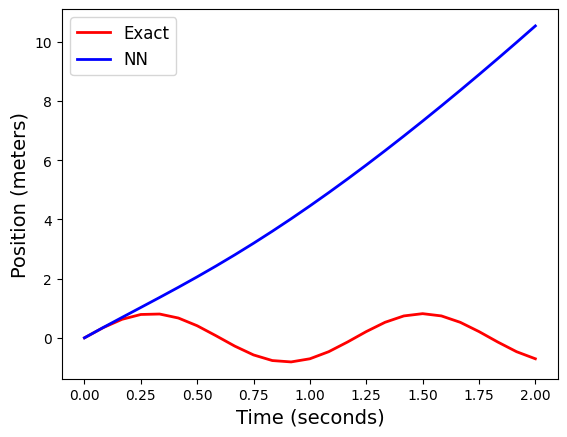

In [ ]:
plt.plot(t, y_exact,linewidth=2,color="red",label="Exact")
plt.plot(t, y_nn,linewidth=2,color="blue",label="NN")
plt.legend(fontsize=12)
plt.xlabel("Time (seconds)",fontsize=14)
plt.ylabel("Position (meters)",fontsize=14)

In [ ]:
def rmse(A,B):
    """
        Inputs:
            A,B (NumPy arrays)
        Returns:
            Unnamed (a float): the RMSE error between A and B
        Calculates the RMSE error between A and B.
    """
    assert len(A)==len(B),"The data sets must be the same length to calcualte\
        the RMSE."
    return np.sqrt(np.average((A-B)**2))

In [ ]:

print("RMSE of the Neural Network Solution:", rmse(y_exact,y_nn))

RMSE of the Neural Network Solution: 5.728000660151


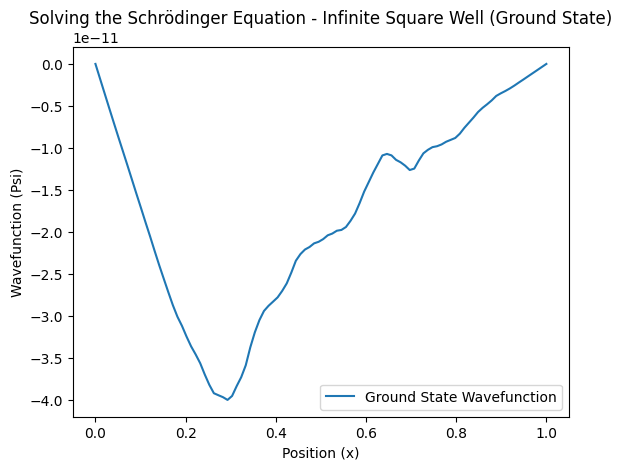

In [ ]:
import numpy as np
from scipy.integrate import solve_bvp
'''We can also use a bvp case and plot a wave function to represent the scrodinger equation'''
# Define the Schrödinger Equation for Infinite Square Well
def potential(x):
    return 0  # Potential energy for the infinite square well

def schrodinger_eqn(x, y, energy):
    h_bar = 1  # Reduced Planck's constant
    m = 1      # Particle mass

    psi, d_psi_dx = y

    d_psi2_dx2 = (2 * m / h_bar**2) * (potential(x) - energy) * psi

    return np.vstack([d_psi_dx, d_psi2_dx2])

# Define the boundary condition function
def bc(ya, yb):
    return np.array([ya[0], yb[0]])

# Discretize the Equation
x_min, x_max = 0, 1  # Define the range of the well
num_points = 100
x_values = np.linspace(x_min, x_max, num_points)

# Generate Training Data for Known Energy Eigenstate (Ground State)
energy_ground_state = 1.5
initial_guess = np.zeros((2, num_points))
initial_guess[0] = np.sin(np.pi * x_values)  # Initial guess for the ground state wavefunction

# Solve the Differential Equation using solve_bvp
solution_ground_state = solve_bvp(lambda x, y: schrodinger_eqn(x, y, energy_ground_state),bc,x_values,
                                  initial_guess)

# Plot the Results
import matplotlib.pyplot as plt

plt.plot(x_values, solution_ground_state.sol(x_values)[0], label='Ground State Wavefunction')
plt.xlabel('Position (x)')
plt.ylabel('Wavefunction (Psi)')
plt.title('Solving the Schrödinger Equation - Infinite Square Well (Ground State)')
plt.legend()
plt.show()